Generating figures for COMP90051 Assignment 2 Report...
1. Creating model comparison chart...


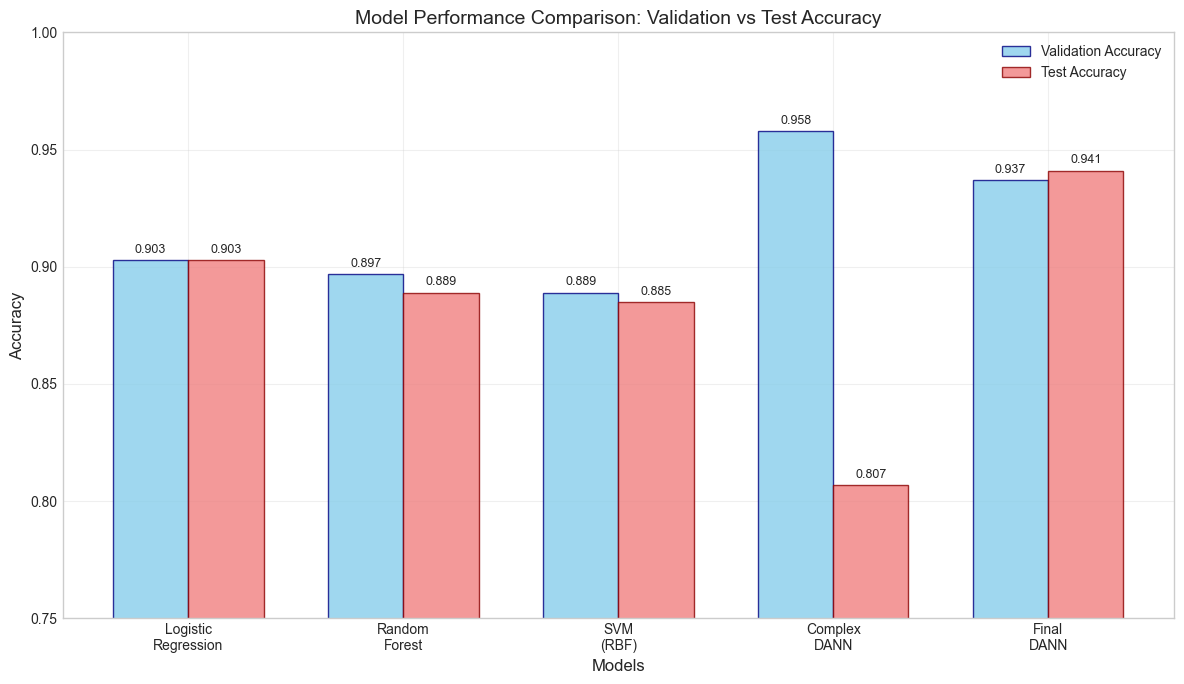

2. Creating domain accuracy comparison...


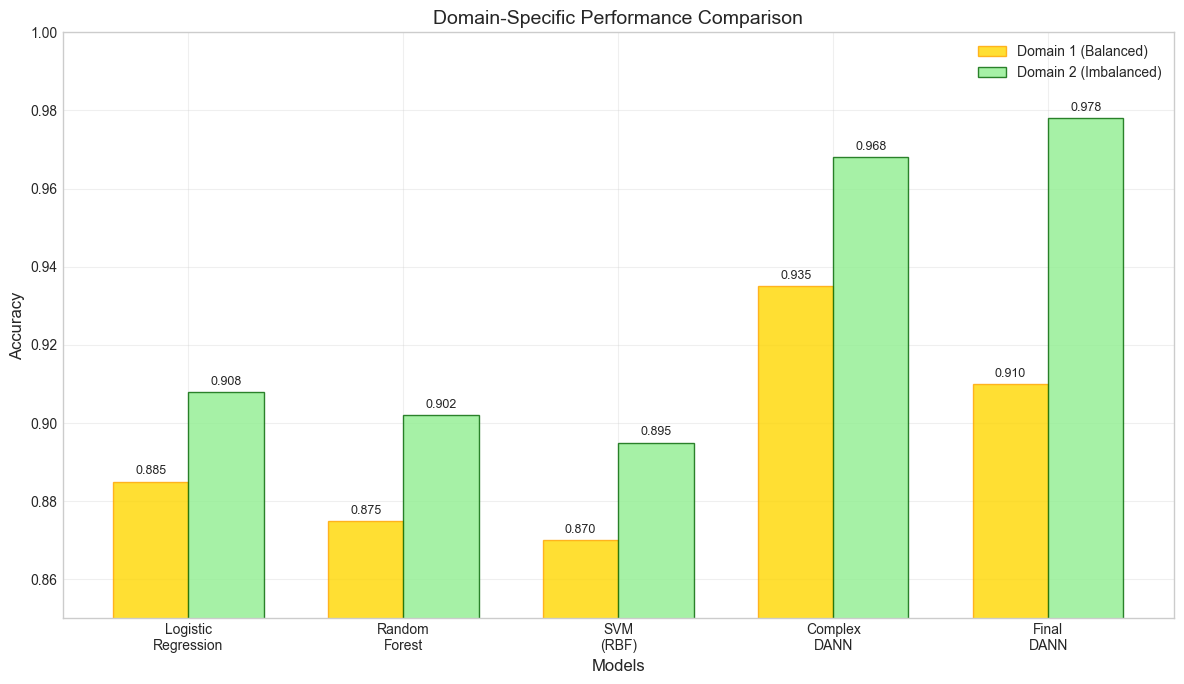

3. Creating training loss curves...


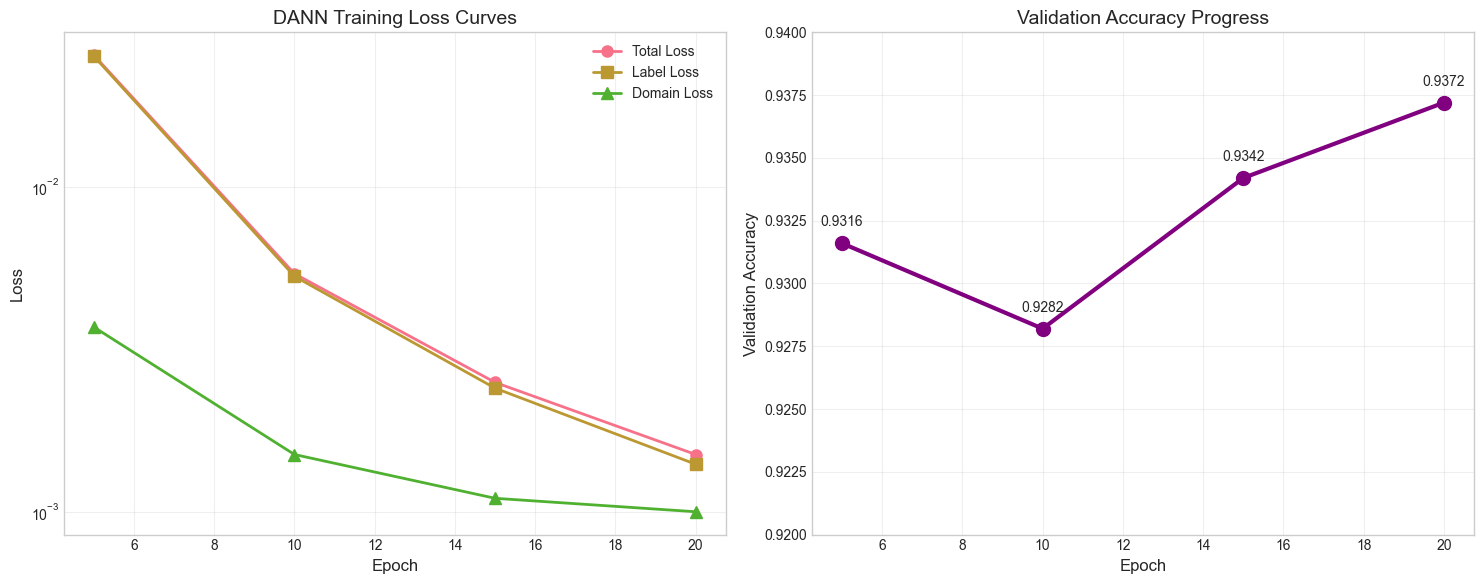

4. Creating data distribution analysis...


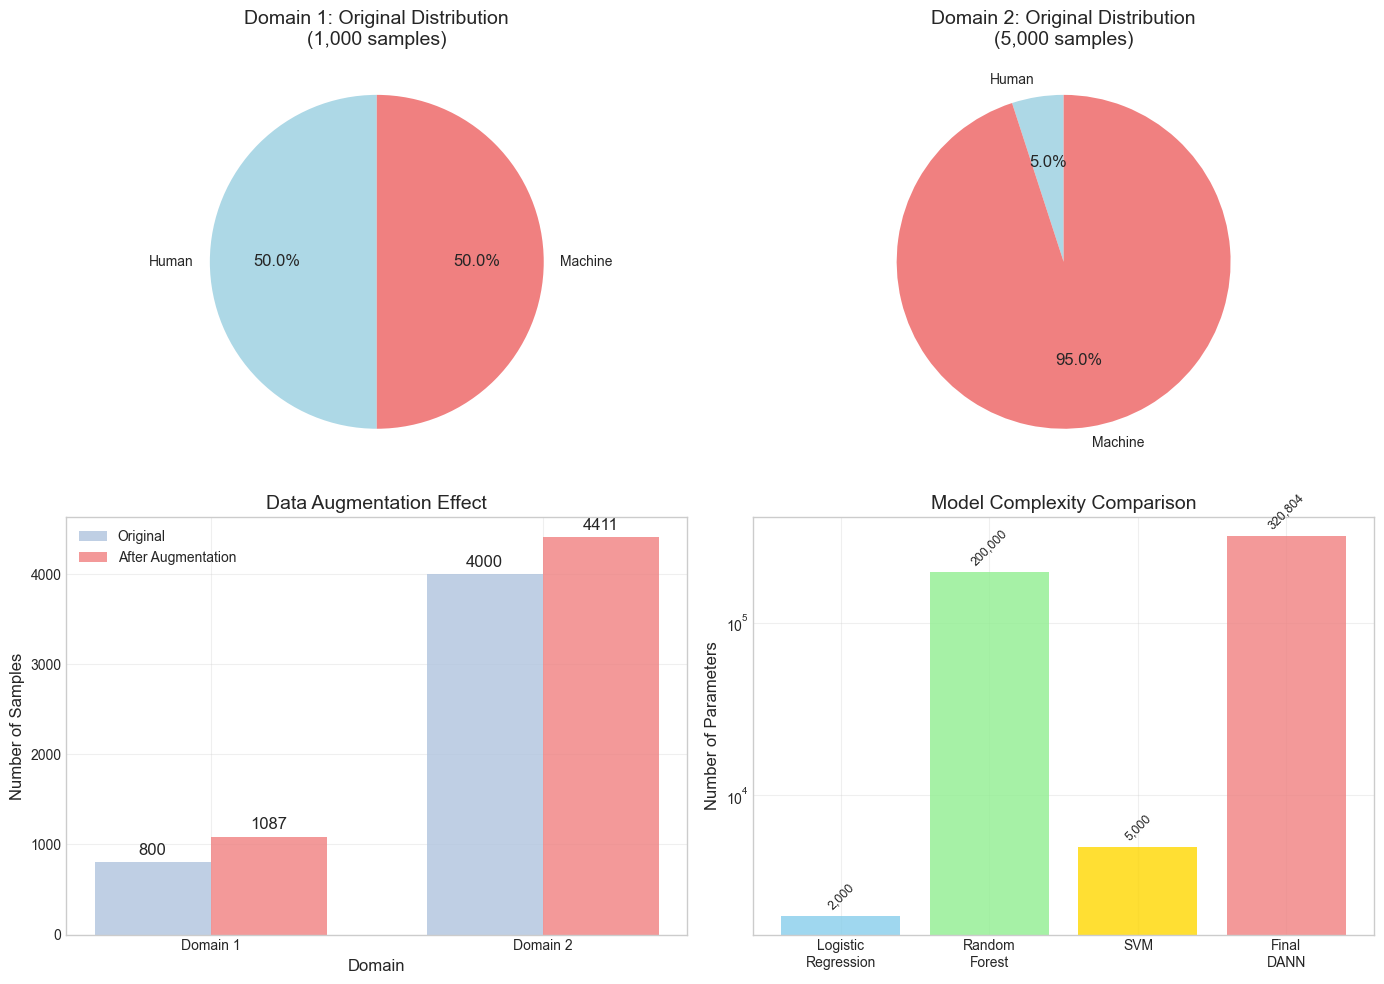

5. Creating optimization journey...


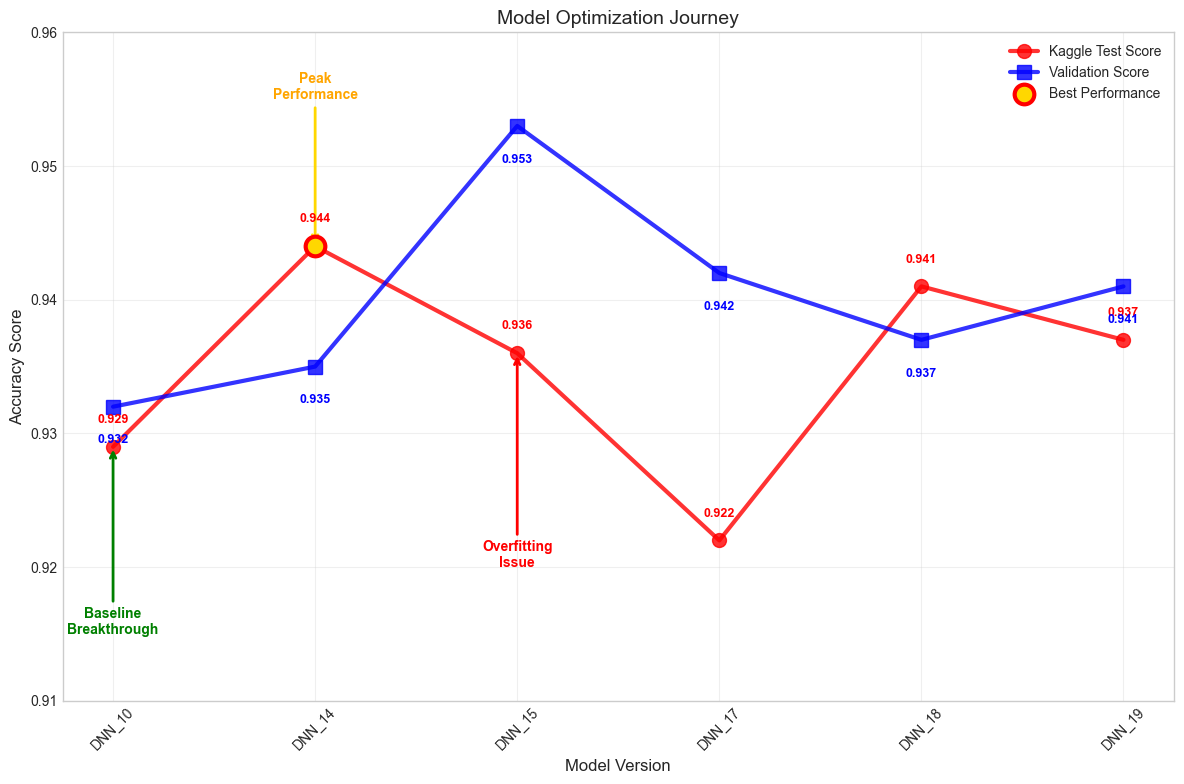

6. Creating DANN architecture diagram...


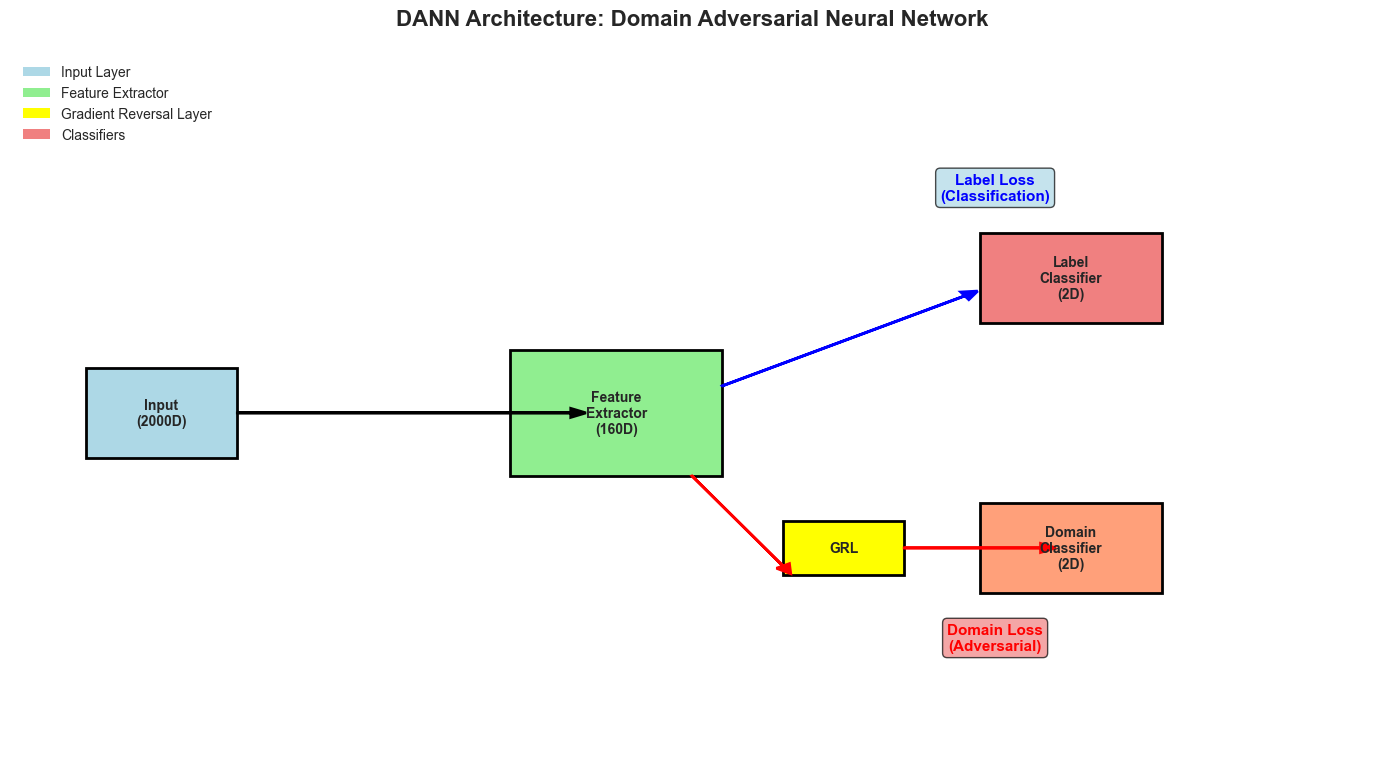


All figures generated successfully!
Files created:
- model_comparison.png
- domain_accuracy_comparison.png
- training_curves.png
- data_distribution_analysis.png
- optimization_journey.png
- dann_architecture.png

You can now include these figures in your LaTeX report.


In [1]:
#!/usr/bin/env python3
"""
Generate figures for COMP90051 Assignment 2 Report
Run this script to create all necessary plots for the LaTeX report
"""

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.patches import Rectangle
import matplotlib.patches as mpatches

# Set style for publication-quality figures
try:
    plt.style.use('seaborn-v0_8-whitegrid')
except:
    try:
        plt.style.use('seaborn-whitegrid')
    except:
        plt.style.use('default')

sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['legend.fontsize'] = 10

def create_model_comparison_chart():
    """Create model performance comparison chart"""
    models = ['Logistic\nRegression', 'Random\nForest', 'SVM\n(RBF)', 'Complex\nDANN', 'Final\nDANN']
    validation_acc = [0.903, 0.897, 0.889, 0.958, 0.937]
    test_acc = [0.903, 0.889, 0.885, 0.807, 0.941]
    
    x = np.arange(len(models))
    width = 0.35
    
    fig, ax = plt.subplots(figsize=(12, 7))
    
    bars1 = ax.bar(x - width/2, validation_acc, width, label='Validation Accuracy', 
                   color='skyblue', alpha=0.8, edgecolor='navy', linewidth=1)
    bars2 = ax.bar(x + width/2, test_acc, width, label='Test Accuracy', 
                   color='lightcoral', alpha=0.8, edgecolor='darkred', linewidth=1)
    
    ax.set_xlabel('Models')
    ax.set_ylabel('Accuracy')
    ax.set_title('Model Performance Comparison: Validation vs Test Accuracy')
    ax.set_xticks(x)
    ax.set_xticklabels(models)
    ax.legend()
    ax.set_ylim(0.75, 1.0)
    ax.grid(True, alpha=0.3)
    
    # Add value labels on bars
    for bar in bars1:
        height = bar.get_height()
        ax.annotate(f'{height:.3f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=9)
    
    for bar in bars2:
        height = bar.get_height()
        ax.annotate(f'{height:.3f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=9)
    
    plt.tight_layout()
    plt.savefig('model_comparison.png', dpi=300, bbox_inches='tight')
    plt.show()

def create_domain_accuracy_comparison():
    """Create domain-specific accuracy comparison"""
    models = ['Logistic\nRegression', 'Random\nForest', 'SVM\n(RBF)', 'Complex\nDANN', 'Final\nDANN']
    domain1_acc = [0.885, 0.875, 0.870, 0.935, 0.910]
    domain2_acc = [0.908, 0.902, 0.895, 0.968, 0.978]
    
    x = np.arange(len(models))
    width = 0.35
    
    fig, ax = plt.subplots(figsize=(12, 7))
    
    bars1 = ax.bar(x - width/2, domain1_acc, width, label='Domain 1 (Balanced)', 
                   color='gold', alpha=0.8, edgecolor='orange', linewidth=1)
    bars2 = ax.bar(x + width/2, domain2_acc, width, label='Domain 2 (Imbalanced)', 
                   color='lightgreen', alpha=0.8, edgecolor='darkgreen', linewidth=1)
    
    ax.set_xlabel('Models')
    ax.set_ylabel('Accuracy')
    ax.set_title('Domain-Specific Performance Comparison')
    ax.set_xticks(x)
    ax.set_xticklabels(models)
    ax.legend()
    ax.set_ylim(0.85, 1.0)
    ax.grid(True, alpha=0.3)
    
    # Add value labels on bars
    for bar in bars1:
        height = bar.get_height()
        ax.annotate(f'{height:.3f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=9)
    
    for bar in bars2:
        height = bar.get_height()
        ax.annotate(f'{height:.3f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=9)
    
    plt.tight_layout()
    plt.savefig('domain_accuracy_comparison.png', dpi=300, bbox_inches='tight')
    plt.show()

def create_training_loss_curve():
    """Create DANN training loss curve"""
    epochs = [5, 10, 15, 20]
    total_loss = [0.0254, 0.0054, 0.0025, 0.0015]
    label_loss = [0.0252, 0.0053, 0.0024, 0.0014]
    domain_loss = [0.0037, 0.0015, 0.0011, 0.0010]
    validation_acc = [0.9316, 0.9282, 0.9342, 0.9372]
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Loss curves
    ax1.plot(epochs, total_loss, 'o-', label='Total Loss', linewidth=2, markersize=8)
    ax1.plot(epochs, label_loss, 's-', label='Label Loss', linewidth=2, markersize=8)
    ax1.plot(epochs, domain_loss, '^-', label='Domain Loss', linewidth=2, markersize=8)
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss')
    ax1.set_title('DANN Training Loss Curves')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    ax1.set_yscale('log')
    
    # Validation accuracy
    ax2.plot(epochs, validation_acc, 'o-', color='purple', linewidth=3, markersize=10)
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Validation Accuracy')
    ax2.set_title('Validation Accuracy Progress')
    ax2.grid(True, alpha=0.3)
    ax2.set_ylim(0.92, 0.94)
    
    # Add value annotations
    for i, (epoch, acc) in enumerate(zip(epochs, validation_acc)):
        ax2.annotate(f'{acc:.4f}', 
                    xy=(epoch, acc), 
                    xytext=(0, 10),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=10)
    
    plt.tight_layout()
    plt.savefig('training_curves.png', dpi=300, bbox_inches='tight')
    plt.show()

def create_data_distribution_chart():
    """Create data distribution visualization"""
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 10))
    
    # Domain 1 original distribution
    labels = ['Human', 'Machine']
    sizes1 = [500, 500]
    colors1 = ['lightblue', 'lightcoral']
    ax1.pie(sizes1, labels=labels, colors=colors1, autopct='%1.1f%%', startangle=90)
    ax1.set_title('Domain 1: Original Distribution\n(1,000 samples)')
    
    # Domain 2 original distribution
    sizes2 = [250, 4750]
    ax2.pie(sizes2, labels=labels, colors=colors1, autopct='%1.1f%%', startangle=90)
    ax2.set_title('Domain 2: Original Distribution\n(5,000 samples)')
    
    # Data augmentation effect
    domains = ['Domain 1', 'Domain 2']
    original = [800, 4000]  # Training split
    augmented = [1087, 4411]
    
    x = np.arange(len(domains))
    width = 0.35
    
    bars1 = ax3.bar(x - width/2, original, width, label='Original', 
                   color='lightsteelblue', alpha=0.8)
    bars2 = ax3.bar(x + width/2, augmented, width, label='After Augmentation', 
                   color='lightcoral', alpha=0.8)
    
    ax3.set_xlabel('Domain')
    ax3.set_ylabel('Number of Samples')
    ax3.set_title('Data Augmentation Effect')
    ax3.set_xticks(x)
    ax3.set_xticklabels(domains)
    ax3.legend()
    ax3.grid(True, alpha=0.3)
    
    # Add value labels
    for bar in bars1:
        height = bar.get_height()
        ax3.annotate(f'{int(height)}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')
    
    for bar in bars2:
        height = bar.get_height()
        ax3.annotate(f'{int(height)}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')
    
    # Model complexity comparison
    models = ['Logistic\nRegression', 'Random\nForest', 'SVM', 'Final\nDANN']
    parameters = [2000, 200000, 5000, 320804]  # Approximate parameter counts
    
    bars = ax4.bar(models, parameters, color=['skyblue', 'lightgreen', 'gold', 'lightcoral'], alpha=0.8)
    ax4.set_ylabel('Number of Parameters')
    ax4.set_title('Model Complexity Comparison')
    ax4.set_yscale('log')
    ax4.grid(True, alpha=0.3)
    
    # Add value labels
    for bar in bars:
        height = bar.get_height()
        ax4.annotate(f'{int(height):,}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom', rotation=45, fontsize=9)
    
    plt.tight_layout()
    plt.savefig('data_distribution_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()

def create_optimization_journey():
    """Create optimization journey visualization"""
    versions = ['DNN_10', 'DNN_14', 'DNN_15', 'DNN_17', 'DNN_18', 'DNN_19']
    kaggle_scores = [0.929, 0.944, 0.936, 0.922, 0.941, 0.937]
    validation_scores = [0.932, 0.935, 0.953, 0.942, 0.937, 0.941]
    
    fig, ax = plt.subplots(figsize=(12, 8))
    
    # Plot lines
    line1 = ax.plot(versions, kaggle_scores, 'o-', linewidth=3, markersize=10, 
                   label='Kaggle Test Score', color='red', alpha=0.8)
    line2 = ax.plot(versions, validation_scores, 's-', linewidth=3, markersize=10, 
                   label='Validation Score', color='blue', alpha=0.8)
    
    # Highlight best performance
    best_idx = np.argmax(kaggle_scores)
    ax.scatter(versions[best_idx], kaggle_scores[best_idx], s=200, color='gold', 
              edgecolor='red', linewidth=3, zorder=5, label='Best Performance')
    
    ax.set_xlabel('Model Version')
    ax.set_ylabel('Accuracy Score')
    ax.set_title('Model Optimization Journey')
    ax.legend()
    ax.grid(True, alpha=0.3)
    ax.set_ylim(0.91, 0.96)
    
    # Add annotations for key insights
    ax.annotate('Baseline\nBreakthrough', xy=('DNN_10', 0.929), xytext=('DNN_10', 0.915),
                arrowprops=dict(arrowstyle='->', color='green', lw=2),
                ha='center', fontsize=10, color='green', weight='bold')
    
    ax.annotate('Peak\nPerformance', xy=('DNN_14', 0.944), xytext=('DNN_14', 0.955),
                arrowprops=dict(arrowstyle='->', color='gold', lw=2),
                ha='center', fontsize=10, color='orange', weight='bold')
    
    ax.annotate('Overfitting\nIssue', xy=('DNN_15', 0.936), xytext=('DNN_15', 0.920),
                arrowprops=dict(arrowstyle='->', color='red', lw=2),
                ha='center', fontsize=10, color='red', weight='bold')
    
    # Add value labels
    for i, (version, kaggle, validation) in enumerate(zip(versions, kaggle_scores, validation_scores)):
        ax.annotate(f'{kaggle:.3f}', xy=(version, kaggle), xytext=(0, 15),
                   textcoords="offset points", ha='center', va='bottom', 
                   fontsize=9, color='red', weight='bold')
        ax.annotate(f'{validation:.3f}', xy=(version, validation), xytext=(0, -20),
                   textcoords="offset points", ha='center', va='top', 
                   fontsize=9, color='blue', weight='bold')
    
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig('optimization_journey.png', dpi=300, bbox_inches='tight')
    plt.show()

def create_dann_architecture_diagram():
    """Create DANN architecture visualization"""
    fig, ax = plt.subplots(figsize=(14, 8))
    
    # Define positions
    input_pos = (1, 4)
    feature_pos = (4, 4)
    label_pos = (7, 5.5)
    domain_pos = (7, 2.5)
    grl_pos = (5.5, 2.5)
    
    # Draw components
    # Input
    input_rect = Rectangle((input_pos[0]-0.5, input_pos[1]-0.5), 1, 1, 
                          facecolor='lightblue', edgecolor='black', linewidth=2)
    ax.add_patch(input_rect)
    ax.text(input_pos[0], input_pos[1], 'Input\n(2000D)', ha='center', va='center', fontsize=10, weight='bold')
    
    # Feature Extractor
    feature_rect = Rectangle((feature_pos[0]-0.7, feature_pos[1]-0.7), 1.4, 1.4, 
                           facecolor='lightgreen', edgecolor='black', linewidth=2)
    ax.add_patch(feature_rect)
    ax.text(feature_pos[0], feature_pos[1], 'Feature\nExtractor\n(160D)', ha='center', va='center', fontsize=10, weight='bold')
    
    # Label Classifier
    label_rect = Rectangle((label_pos[0]-0.6, label_pos[1]-0.5), 1.2, 1, 
                          facecolor='lightcoral', edgecolor='black', linewidth=2)
    ax.add_patch(label_rect)
    ax.text(label_pos[0], label_pos[1], 'Label\nClassifier\n(2D)', ha='center', va='center', fontsize=10, weight='bold')
    
    # GRL
    grl_rect = Rectangle((grl_pos[0]-0.4, grl_pos[1]-0.3), 0.8, 0.6, 
                        facecolor='yellow', edgecolor='black', linewidth=2)
    ax.add_patch(grl_rect)
    ax.text(grl_pos[0], grl_pos[1], 'GRL', ha='center', va='center', fontsize=10, weight='bold')
    
    # Domain Classifier
    domain_rect = Rectangle((domain_pos[0]-0.6, domain_pos[1]-0.5), 1.2, 1, 
                           facecolor='lightsalmon', edgecolor='black', linewidth=2)
    ax.add_patch(domain_rect)
    ax.text(domain_pos[0], domain_pos[1], 'Domain\nClassifier\n(2D)', ha='center', va='center', fontsize=10, weight='bold')
    
    # Draw arrows
    # Input to Feature
    ax.arrow(input_pos[0]+0.5, input_pos[1], 2.2, 0, head_width=0.1, head_length=0.1, 
             fc='black', ec='black', linewidth=2)
    
    # Feature to Label
    ax.arrow(feature_pos[0]+0.7, feature_pos[1]+0.3, 1.6, 1.0, head_width=0.1, head_length=0.1, 
             fc='blue', ec='blue', linewidth=2)
    
    # Feature to GRL
    ax.arrow(feature_pos[0]+0.5, feature_pos[1]-0.7, 0.6, -1.0, head_width=0.1, head_length=0.1, 
             fc='red', ec='red', linewidth=2)
    
    # GRL to Domain
    ax.arrow(grl_pos[0]+0.4, grl_pos[1], 0.9, 0, head_width=0.1, head_length=0.1, 
             fc='red', ec='red', linewidth=2)
    
    # Add labels for losses
    ax.text(6.5, 6.5, 'Label Loss\n(Classification)', ha='center', va='center', 
           fontsize=11, color='blue', weight='bold',
           bbox=dict(boxstyle="round,pad=0.3", facecolor='lightblue', alpha=0.7))
    
    ax.text(6.5, 1.5, 'Domain Loss\n(Adversarial)', ha='center', va='center', 
           fontsize=11, color='red', weight='bold',
           bbox=dict(boxstyle="round,pad=0.3", facecolor='lightcoral', alpha=0.7))
    
    # Add title and formatting
    ax.set_xlim(0, 9)
    ax.set_ylim(0, 8)
    ax.set_title('DANN Architecture: Domain Adversarial Neural Network', fontsize=16, weight='bold', pad=20)
    ax.axis('off')
    
    # Add legend
    legend_elements = [
        mpatches.Rectangle((0, 0), 1, 1, facecolor='lightblue', label='Input Layer'),
        mpatches.Rectangle((0, 0), 1, 1, facecolor='lightgreen', label='Feature Extractor'),
        mpatches.Rectangle((0, 0), 1, 1, facecolor='yellow', label='Gradient Reversal Layer'),
        mpatches.Rectangle((0, 0), 1, 1, facecolor='lightcoral', label='Classifiers')
    ]
    ax.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(0, 1))
    
    plt.tight_layout()
    plt.savefig('dann_architecture.png', dpi=300, bbox_inches='tight')
    plt.show()

def main():
    """Generate all figures for the report"""
    print("Generating figures for COMP90051 Assignment 2 Report...")
    
    print("1. Creating model comparison chart...")
    create_model_comparison_chart()
    
    print("2. Creating domain accuracy comparison...")
    create_domain_accuracy_comparison()
    
    print("3. Creating training loss curves...")
    create_training_loss_curve()
    
    print("4. Creating data distribution analysis...")
    create_data_distribution_chart()
    
    print("5. Creating optimization journey...")
    create_optimization_journey()
    
    print("6. Creating DANN architecture diagram...")
    create_dann_architecture_diagram()
    
    print("\nAll figures generated successfully!")
    print("Files created:")
    print("- model_comparison.png")
    print("- domain_accuracy_comparison.png") 
    print("- training_curves.png")
    print("- data_distribution_analysis.png")
    print("- optimization_journey.png")
    print("- dann_architecture.png")
    print("\nYou can now include these figures in your LaTeX report.")

if __name__ == "__main__":
    main()